In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv('../data/clean_telco.csv')

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Create new features 

In [76]:
tenure_group = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12','13-24','25-48','49-60','61-72'] , include_lowest=True)
df['tenure_group'] = tenure_group

In [80]:
df['avg_monthly_spend'] = df['Total_Charges'] / df['tenure']
df['avg_monthly_spend'] = df['avg_monthly_spend'].replace([np.inf, -np.inf], 0)  
df['avg_monthly_spend'] = df['avg_monthly_spend'].fillna(0)  

In [28]:
df['Num_Services'] = df[['Phone_Service','Internet_Service','Online_Security','Online_Backup',
                         'Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies']].apply(lambda x: sum(x=='Yes'), axis=1)


In [90]:
df['Monthly_to_Total_Ratio'] = df['Monthly_Charges'] / df['Total_Charges']
df['Monthly_to_Total_Ratio'] = df['Monthly_to_Total_Ratio'].replace([np.inf, -np.inf], 0)  
df['Monthly_to_Total_Ratio'] = df['Monthly_to_Total_Ratio'].fillna(0)  

In [29]:
df['Monthly_to_Total_Ratio'] = df['Monthly_Charges'] / df['Total_Charges']


In [30]:
df['Automatic_Payment'] = df['Payment_Method'].isin(['Bank transfer (automatic)', 'Credit card (automatic)']).astype(int)


In [46]:
df['Internet_Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [47]:
df['No_Internet'] = (df['Internet_Service']=='No').astype(int)


In [32]:

df['Any_Streaming'] = ((df['Streaming_TV'] == 'Yes') | (df['Streaming_Movies'] == 'Yes')).astype(int)


In [34]:
def family_type(row):
    if row['Is_Married'] == 'No' and row['Dependents'] == 'No':
        return 'Single'
    elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'No':
        return 'Married_No_Children'
    elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'Yes':
        return 'Married_With_Children'
    elif row['Is_Married'] == 'No' and row['Dependents'] == 'Yes':
        return 'Single_With_Children'  # optional, if this case exists
    else:
        return 'Unknown'  # safety fallback


df['Family_Type'] = df.apply(family_type, axis=1)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   object  
 2   Senior_Citizen          7043 non-null   int64   
 3   Is_Married              7043 non-null   object  
 4   Dependents              7043 non-null   object  
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   object  
 7   Dual                    7043 non-null   object  
 8   Internet_Service        7043 non-null   object  
 9   Online_Security         7043 non-null   object  
 10  Online_Backup           7043 non-null   object  
 11  Device_Protection       7043 non-null   object  
 12  Tech_Support            7043 non-null   object  
 13  Streaming_TV            7043 non-null   object  
 14  Streaming_Movies        

In [39]:
# Display unique values for object columns to identify categorical features
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nFeature: {col}")
    print(f"Unique Values: {df[col].unique()}")


Feature: customerID
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Feature: gender
Unique Values: ['Female' 'Male']

Feature: Is_Married
Unique Values: ['Yes' 'No']

Feature: Dependents
Unique Values: ['No' 'Yes']

Feature: Phone_Service
Unique Values: ['No' 'Yes']

Feature: Dual
Unique Values: ['No phone service' 'No' 'Yes']

Feature: Internet_Service
Unique Values: ['DSL' 'Fiber optic' 'No']

Feature: Online_Security
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Online_Backup
Unique Values: ['Yes' 'No' 'No internet service']

Feature: Device_Protection
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Tech_Support
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Streaming_TV
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Streaming_Movies
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Contract
Unique Values: ['Month-to-month' 'One year' 'Two year']

Feature: Paperless_Bi

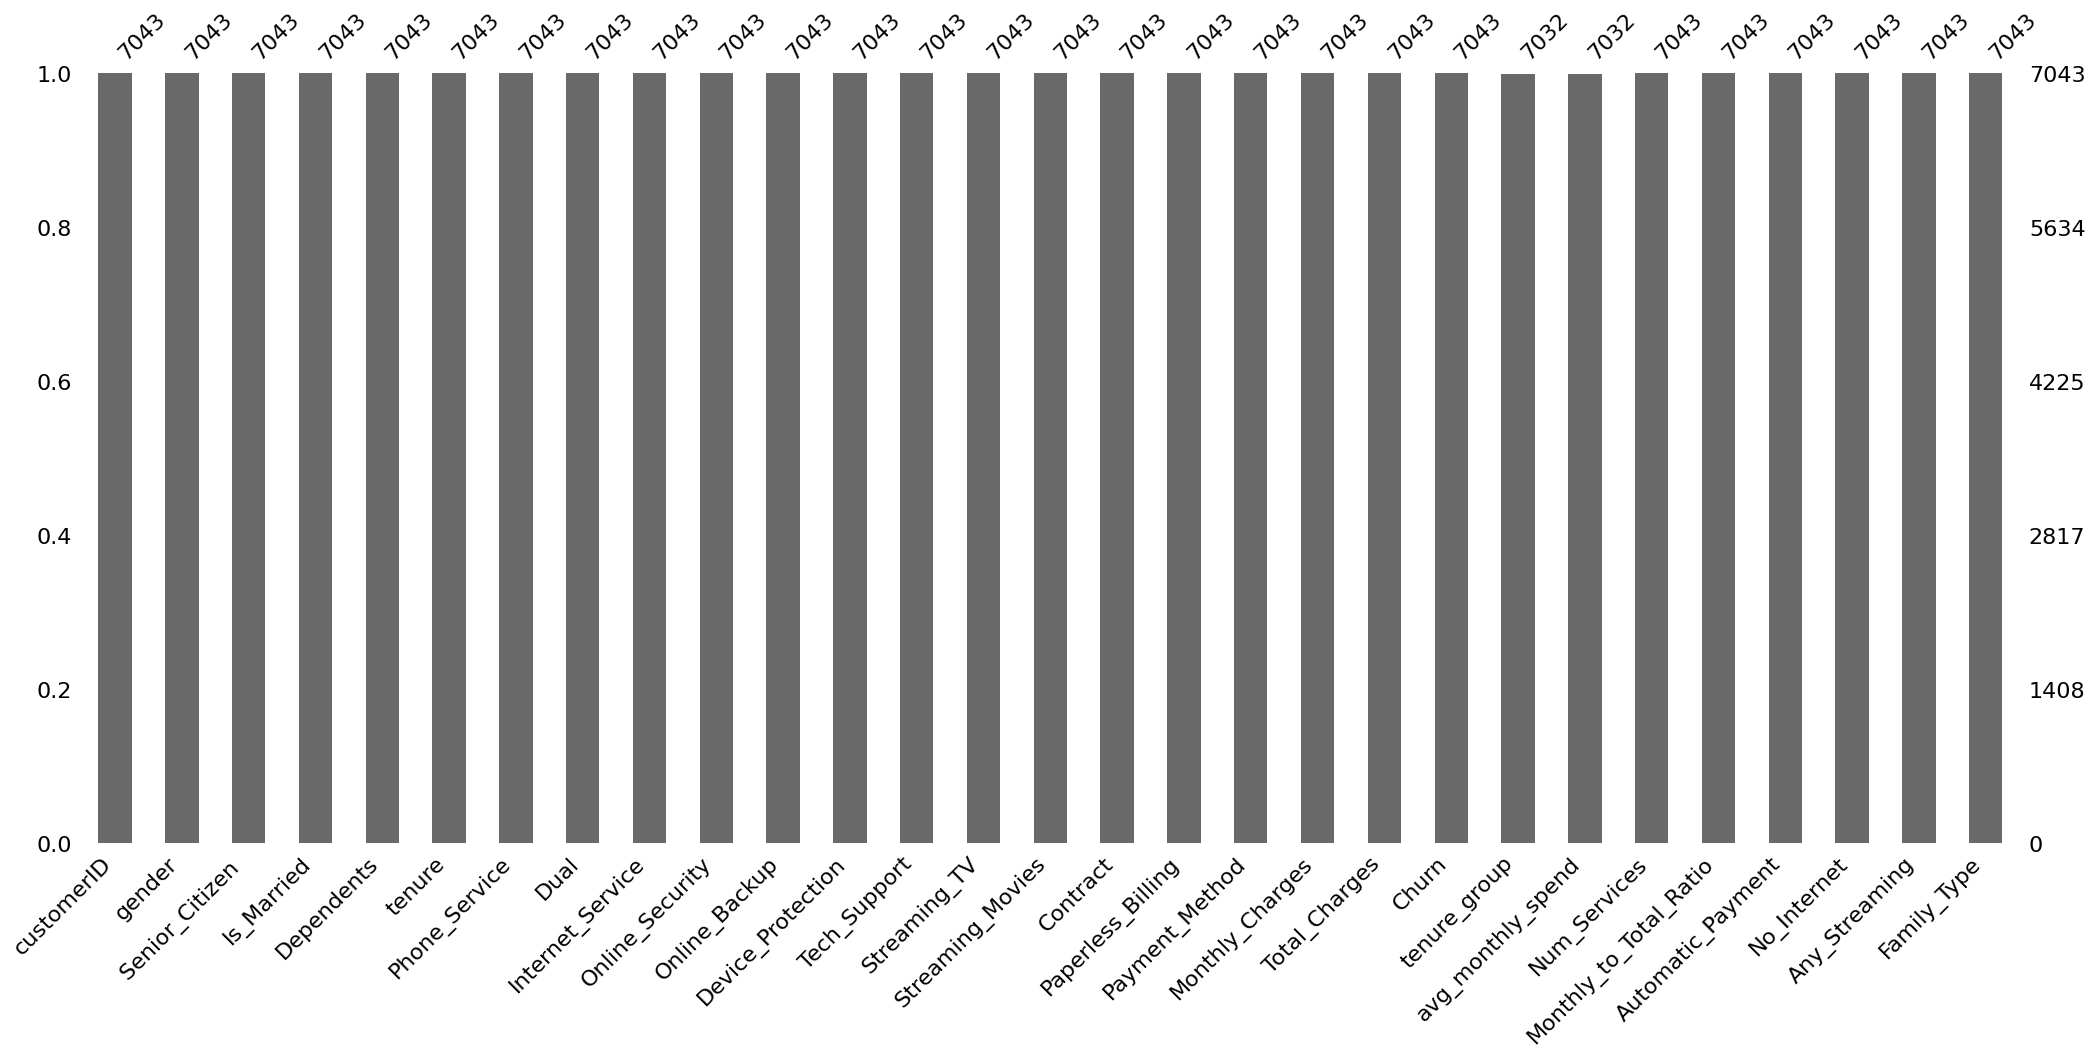

In [38]:
msno.bar(df)
plt.show()

In [40]:
df['Senior_Citizen '].unique()

array([0, 1])

In [42]:
df['Any_Streaming'].unique()

array([0, 1])

In [43]:
df['Automatic_Payment'].unique()

array([0, 1])

In [44]:
df['Family_Type'].unique()  

array(['Married_No_Children', 'Single', 'Single_With_Children',
       'Married_With_Children'], dtype=object)

In [48]:
df['No_Internet'].unique()

array([0, 1])

In [52]:

categorical_features = [
    'gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
    'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
    'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
    'Paperless_Billing', 'Payment_Method', 'Churn', 'Family_Type','Senior_Citizen ','Any_Streaming','Automatic_Payment'
]

df[categorical_features] = df[categorical_features].astype('category')


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [ ]:
def generate_features(row):
    """
    Generate features for a single row or DataFrame.
    """
    if 'tenure' in row:
        row['tenure_group'] = pd.cut(
            [row['tenure']],
            bins=[0, 12, 24, 48, 60, 72],
            labels=['0-12', '13-24', '25-48', '49-60', '61-72']
        )[0]
    
    if 'Total_Charges' in row and 'tenure' in row and row['tenure'] > 0:
        row['avg_monthly_spend'] = row['Total_Charges'] / row['tenure']
    else:
        row['avg_monthly_spend'] = 0
    
    service_columns = [
        'Phone_Service', 'Internet_Service', 'Online_Security', 'Online_Backup',
        'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies'
    ]
    if all(col in row for col in service_columns):
        row['Num_Services'] = sum(row[col] == 'Yes' for col in service_columns)
    
    if 'Monthly_Charges' in row and 'Total_Charges' in row and row['Total_Charges'] > 0:
        row['Monthly_to_Total_Ratio'] = row['Monthly_Charges'] / row['Total_Charges']
    else:
        row['Monthly_to_Total_Ratio'] = 0
    
    if 'Payment_Method' in row:
        row['Automatic_Payment'] = int(row['Payment_Method'] in ['Bank transfer (automatic)', 'Credit card (automatic)'])
    
    if 'Internet_Service' in row:
        row['No_Internet'] = int(row['Internet_Service'] == 'No')
    
    if 'Streaming_TV' in row and 'Streaming_Movies' in row:
        row['Any_Streaming'] = int(row['Streaming_TV'] == 'Yes' or row['Streaming_Movies'] == 'Yes')
    
    if 'Is_Married' in row and 'Dependents' in row:
        if row['Is_Married'] == 'No' and row['Dependents'] == 'No':
            row['Family_Type'] = 'Single'
        elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'No':
            row['Family_Type'] = 'Married_No_Children'
        elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'Yes':
            row['Family_Type'] = 'Married_With_Children'
        elif row['Is_Married'] == 'No' and row['Dependents'] == 'Yes':
            row['Family_Type'] = 'Single_With_Children'
        else:
            row['Family_Type'] = 'Unknown'
    
    return row

In [181]:

X = df.drop(columns=['Churn','customerID'])
y = df['Churn']

In [182]:
y= le.fit_transform(y)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [71]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)


<Axes: >

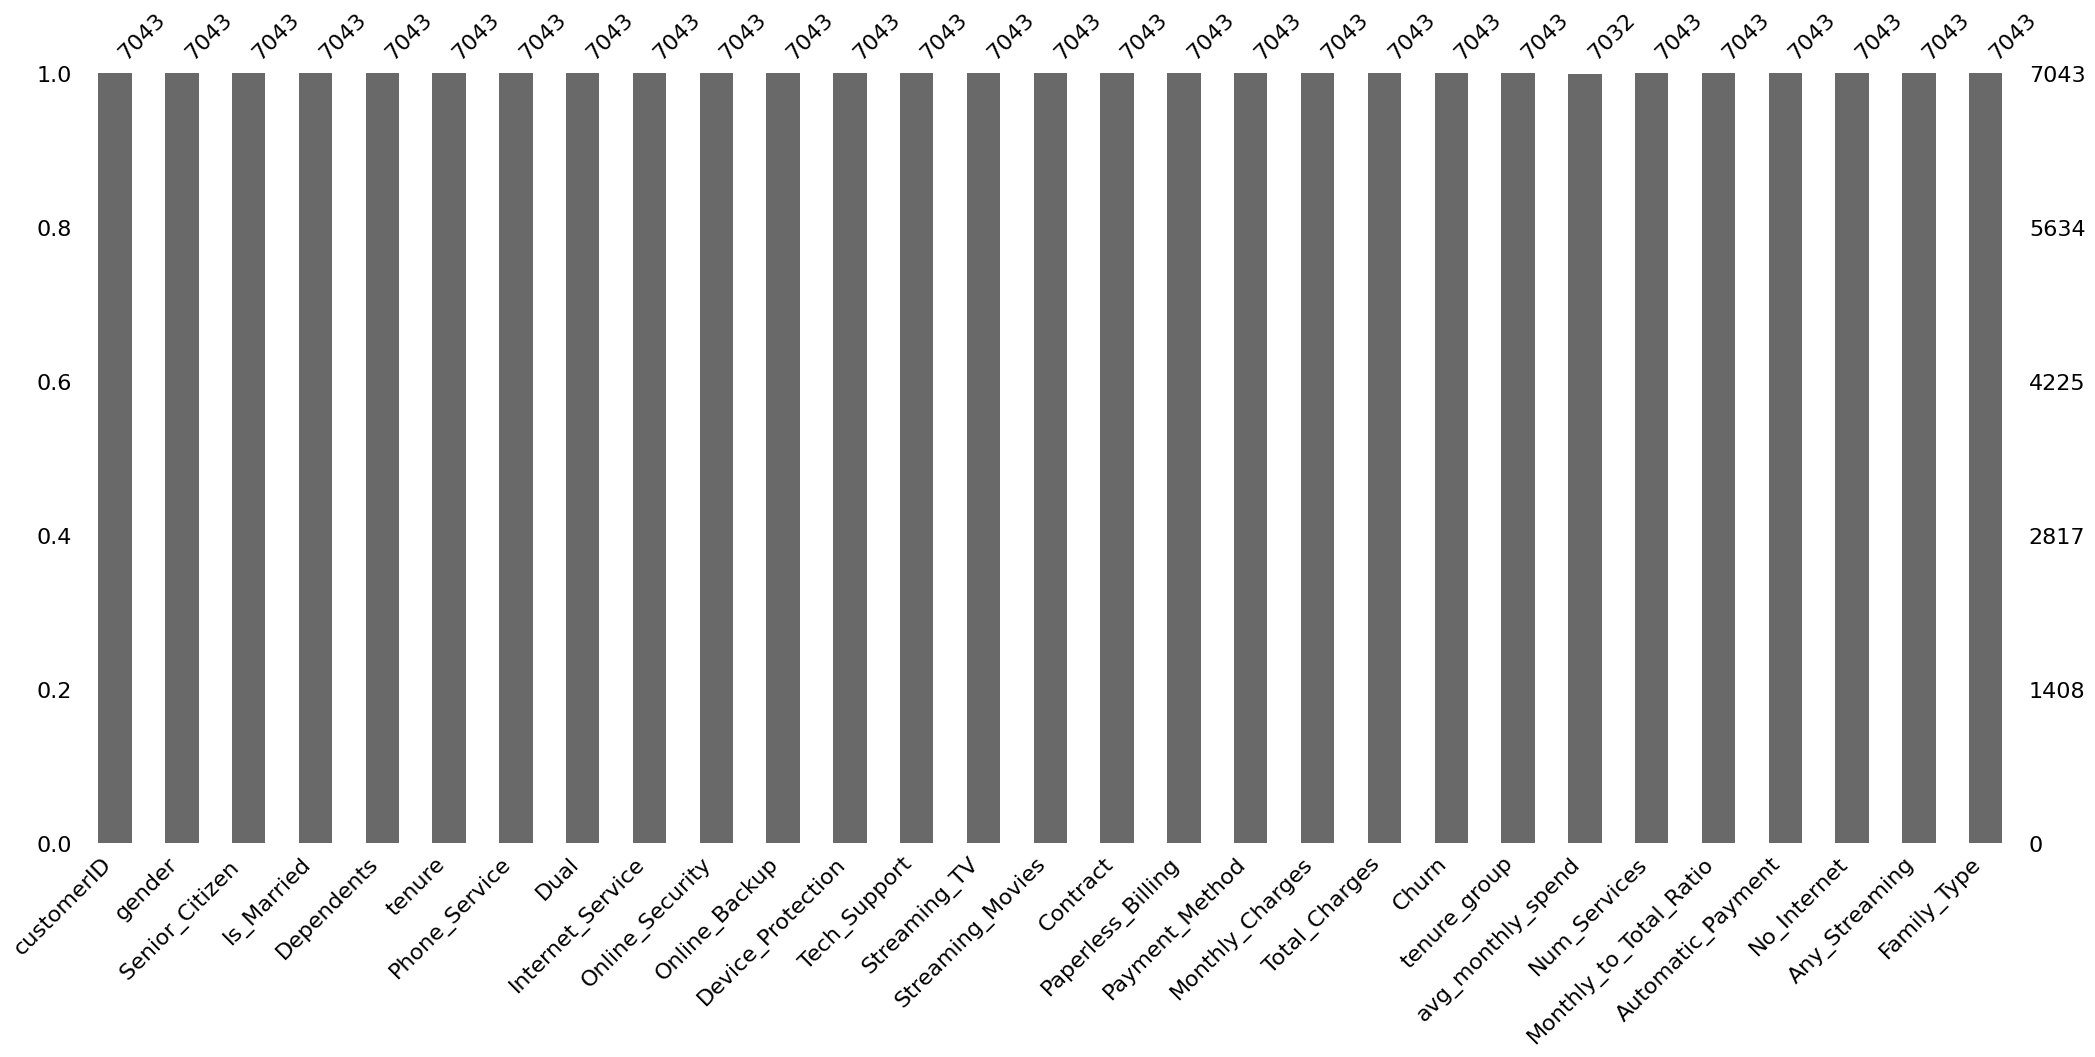

In [77]:
msno.bar(df)

In [180]:
missing_percentages = df.isnull().mean() * 100

print("Percentage of missing values for each feature:")
print(missing_percentages[missing_percentages > 0])  

Percentage of missing values for each feature:
Series([], dtype: float64)


In [75]:

missing_tenure_group = df[df['tenure_group'].isnull()]

print("Tenure values for missing tenure_group:")
print(missing_tenure_group['tenure'])

Tenure values for missing tenure_group:
488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [82]:
numeric_features = ['tenure', 'Monthly_Charges', 'Total_Charges', 'avg_monthly_spend', 'Monthly_to_Total_Ratio']
categorical_features = [
    'gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
    'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
    'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
    'Paperless_Billing', 'Payment_Method', 'Family_Type', 'Senior_Citizen ', 'tenure_group', 'Automatic_Payment', 'No_Internet', 'Any_Streaming'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


numeric_features = ['tenure', 'Monthly_Charges', 'Total_Charges', 'avg_monthly_spend', 'Monthly_to_Total_Ratio']

binary_features = [
    'gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
    'Online_Security', 'Online_Backup', 'Device_Protection',
    'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
    'Paperless_Billing', 'Automatic_Payment', 'Any_Streaming','Senior_Citizen '
]

multi_class_features = [
    'Internet_Service', 'Contract', 'Payment_Method', 'Family_Type', 'tenure_group'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

multi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('multi', multi_transformer, multi_class_features)
    ])


In [129]:

model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(class_weight='balanced', max_iter=2000))])
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown=...
                                                   'Phone_Service', 'Dual',
                                                   'Internet_Service',
                                                   'Online_Security',
                                                   'Online_Backup',
                                                   'Device_Protection',
                                                   'Tech_Support',
                                                   'Streaming_TV',
                                                   'Streaming_Movies',
                                                   'Contract',
                                                   'Paperless_Billing',
                                                   'Payment_Method',
                                                   'Family_Type',
                                                   'Senior_Citizen ',
                                                   'tenure_group',
                                                   'Automatic_Payment',
                                                   'No_Internet',
                                                   'Any_Streaming'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [130]:
from sklearn.metrics import recall_score, f1_score
y_pred = model.predict(X_temp)
print(classification_report(y_temp, y_pred))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409

Recall: 0.7914438502673797
F1 Score: 0.6115702479338843


In [125]:
!pip install optuna



   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------- ----------------------------- 1/4 [colorlog]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def objective(trial):
  
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'sag', 'saga'])
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            C=C,
            solver=solver,
            max_iter=10000,
            random_state=42
        ))
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best parameters
print("Best params:", study.best_params)
print("Best score:", study.best_value)

# Train final model
best_lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',
        **study.best_params,
        max_iter=10000,
        random_state=42
    ))
])

best_lr_pipeline.fit(X_train, y_train)




[I 2025-09-03 18:20:37,299] A new study created in memory with name: no-name-95242c66-57d5-4773-8e13-1a0467b186c0


[I 2025-09-03 18:20:38,484] Trial 0 finished with value: 0.8490221506223788 and parameters: {'C': 0.010194909229492139, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8490221506223788.
[I 2025-09-03 18:20:39,336] Trial 1 finished with value: 0.8496196627468894 and parameters: {'C': 0.018295407424960088, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8496196627468894.
[I 2025-09-03 18:20:39,845] Trial 2 finished with value: 0.8502886080747875 and parameters: {'C': 0.05646769770660039, 'solver': 'liblinear'}. Best is trial 2 with value: 0.8502886080747875.
[I 2025-09-03 18:20:44,423] Trial 3 finished with value: 0.8503449443899429 and parameters: {'C': 98.04412431794185, 'solver': 'sag'}. Best is trial 3 with value: 0.8503449443899429.
[I 2025-09-03 18:20:45,057] Trial 4 finished with value: 0.8501111254736514 and parameters: {'C': 1.0352597305587579, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.8503449443899429.
[I 2025-09-03 18:20:45,775] Trial 5 finished with value: 0.8

Best params: {'C': 33.67917345119462, 'solver': 'lbfgs'}
Best score: 0.8503609436123014


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                                                   'Any_Streaming',
                                                   'Senior_Citizen ']),
                                                 ('multi',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Internet_Service',
                                                   'Contract', 'Payment_Method',
                                                   'Family_Type',
                                                   'tenure_group'])])),
                ('classifier',
                 LogisticRegression(C=33.67917345119462,
                                    class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [149]:
y_temp_lr=best_lr_pipeline.predict(X_temp)
print(classification_report(y_temp, y_temp_lr))
recall = recall_score(y_temp, y_temp_lr)
f1 = f1_score(y_temp, y_temp_lr)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Recall: 0.7967914438502673
F1 Score: 0.6169772256728778


In [191]:
model_name = best_lr_pipeline.named_steps['classifier'].__class__.__name__
print("Best model is:", model_name)


Best model is: LogisticRegression


In [187]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

neg, pos = np.bincount(y_train)  
scale = neg / pos

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale,
        n_estimators=10,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)




c:\Users\EL RWAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:08:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=10, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [188]:
y_pred = xgb_model.predict(X_temp)

print(classification_report(y_temp, y_pred))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

Recall: 0.767379679144385
F1 Score: 0.6225596529284165


In [135]:
! pip install scikit-optimize



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline

# imbalance ratio
neg, pos = np.bincount(y_train)
scale = neg / pos

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale,
        random_state=42
    ))
])

# Define parameter search space
param_space = {
    'classifier__n_estimators': (100, 1000),
    'classifier__max_depth': (3, 10),
    'classifier__learning_rate': (1e-3, 0.3, 'log-uniform'),
    'classifier__subsample': (0.5, 1.0),
    'classifier__colsample_bytree': (0.5, 1.0),
    'classifier__gamma': (0, 5),
    'classifier__min_child_weight': (1, 10)
}


opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    n_iter=30, 
    cv=3,       
    scoring='f1',  
    n_jobs=-1,
    random_state=42
)


opt.fit(X_train, y_train)

print("Best params:", opt.best_params_)
print("Best score:", opt.best_score_)


c:\Users\EL RWAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: OrderedDict([('classifier__colsample_bytree', 0.5), ('classifier__gamma', 3), ('classifier__learning_rate', 0.001), ('classifier__max_depth', 6), ('classifier__min_child_weight', 4), ('classifier__n_estimators', 403), ('classifier__subsample', 1.0)])
Best score: 0.6372738586160835


In [186]:
y_opt=opt.predict(X_temp)
print(classification_report(y_temp, y_opt))
recall = recall_score(y_temp, y_opt)
f1 = f1_score(y_temp, y_opt)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

Recall: 0.8048128342245989
F1 Score: 0.6404255319148936


In [172]:
best_pipeline = opt.best_estimator_


In [173]:
xgb_model = best_pipeline.named_steps['classifier']


<Figure size 1200x800 with 0 Axes>

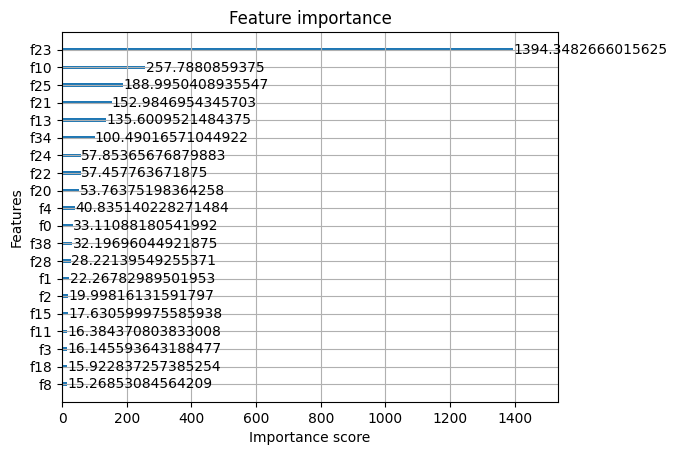

In [174]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.show()


In [175]:
importances = xgb_model.feature_importances_

<Figure size 1000x600 with 0 Axes>

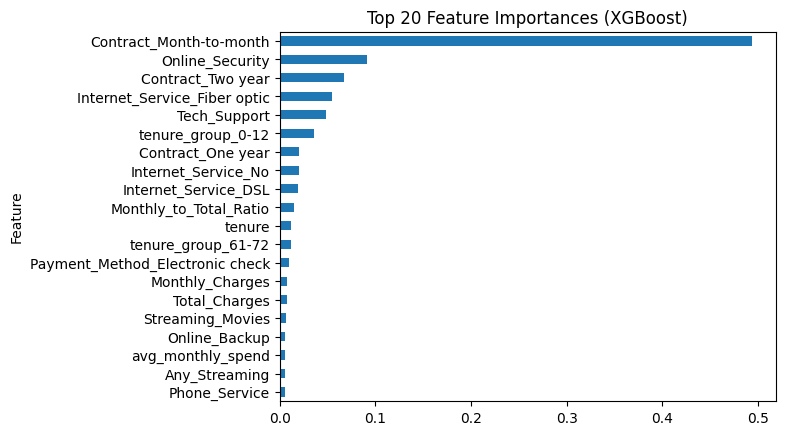

,Feature,Importance
23,Contract_Month-to-month,0.494051
10,Online_Security,0.091341
25,Contract_Two year,0.066965
21,Internet_Service_Fiber optic,0.054206
13,Tech_Support,0.048047
34,tenure_group_0-12,0.035606
24,Contract_One year,0.020499
22,Internet_Service_No,0.020359
20,Internet_Service_DSL,0.019050
4,Monthly_to_Total_Ratio,0.014469


In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the trained XGBoost model from the pipeline
xgb_model = opt.best_estimator_.named_steps['classifier']

# 1. Numeric features
num_features_out = numeric_features

# 2. Binary features (ordinal/label encoded) – no expansion
bin_features_out = binary_features

# 3. Multi-class categorical features (OHE expands them)
ohe = preprocessor.named_transformers_['multi'].named_steps['onehot']
multi_features_out = list(ohe.get_feature_names_out(multi_class_features))

# Combine all feature names
all_features = num_features_out + bin_features_out + multi_features_out

# 4. Get feature importances from XGBoost
importances = xgb_model.feature_importances_

# 5. Build DataFrame
fi_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Plot
plt.figure(figsize=(10, 6))
fi_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

fi_df.head(30)  # Show top 30 in the notebook


In [179]:

df_fe = df.copy()

def risky_contract(row):
    if row['Contract'] == 'Month-to-month' and row['tenure'] <= 12:
        return "HighRisk"
    elif row['Contract'] == 'Month-to-month' and row['tenure'] > 12:
        return "MediumRisk"
    else:
        return "LowRisk"

df['Contract_Tenure_Risk'] = df.apply(risky_contract, axis=1)

print(df['Contract_Tenure_Risk'].value_counts(normalize=True))


Contract_Tenure_Risk
LowRisk       0.449808
HighRisk      0.283118
MediumRisk    0.267074
Name: proportion, dtype: float64


In [138]:
! pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 5.6 MB/s eta 0:00:19
    --------------------------------------- 1.6/102.5 MB 5.2 MB/s eta 0:00:20
   - -------------------------------------- 2.9/102.5 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 3.9/102.5 MB 5.3 MB/s eta 0:00:19
   - -------------------------------------- 5.0/102.5 MB 5.3 MB/s eta 0:00:19
   -- ------------------------------------- 6.0/102.5 MB 5.3 MB/s eta 0:00:19
   -- ------------------------------------- 7.1/102.5 MB 5.3 MB/s eta 0:00:19
   --- ------------------------------------ 8.4/102.5 MB 5.3 MB/s eta 0:00:18
   --- ------------------------------------ 9.4/102.5 MB 5.3 MB/s eta 0:00:18
   ---- ----------------------------------- 10.5/102.5 MB 5.3 MB/s eta 0:00:18
   ---- ----------------------------------- 11.0/102.5 MB 5.3 MB/s eta 0:00:18
   ---- ----------------------------------- 11.3/102.5 MB 4.9 MB/s et


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [211]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

# CatBoost classifier
cat_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        eval_metric='AUC',
        random_seed=42,
        verbose=100,
        class_weights=[1, 3]  
    ))
])

# Fit
cat_model.fit(X_train, y_train)




0:	total: 52.3ms	remaining: 26.1s
100:	total: 1.5s	remaining: 5.92s
200:	total: 2.69s	remaining: 4.01s
300:	total: 4.28s	remaining: 2.83s
400:	total: 5.47s	remaining: 1.35s
499:	total: 6.88s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                                                   'Paperless_Billing',
                                                   'Automatic_Payment',
                                                   'Any_Streaming',
                                                   'Senior_Citizen ']),
                                                 ('multi',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Internet_Service',
                                                   'Contract', 'Payment_Method',
                                                   'Family_Type',
                                                   'tenure_group'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000251570ADE10>)])

In [203]:
# Predict
y_pred = cat_model.predict(X_temp)
y_proba = cat_model.predict_proba(X_temp)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_temp, y_pred))
print("ROC-AUC:", roc_auc_score(y_temp, y_proba))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

ROC-AUC: 0.8398227802319873
Recall: 0.7486631016042781
F1 Score: 0.6194690265486725


In [156]:
import optuna
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


def objective(trial):
    catboost_params = dict(
        iterations = trial.suggest_int("iterations", 200, 800),
        depth = trial.suggest_int("depth", 4, 10),
        learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1, 10),
        border_count = trial.suggest_int("border_count", 32, 255),
        random_seed = 42,
        verbose = 0,
        eval_metric = "AUC"
    )
   
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(**catboost_params))
    ])
    
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc")
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best ROC-AUC:", study.best_value)

best_params = study.best_params
final_catboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(**best_params, random_seed=42, verbose=100))
])

final_catboost.fit(X_train, y_train)


[I 2025-09-03 18:29:02,266] A new study created in memory with name: no-name-5a1800a1-b171-4493-ab3b-e6d86feb3cd0
[I 2025-09-03 18:29:20,329] Trial 0 finished with value: 0.8195377347322156 and parameters: {'iterations': 247, 'depth': 8, 'learning_rate': 0.19669279300147915, 'l2_leaf_reg': 3.558221878613045, 'border_count': 240}. Best is trial 0 with value: 0.8195377347322156.
[I 2025-09-03 18:29:49,378] Trial 1 finished with value: 0.8455503544562536 and parameters: {'iterations': 568, 'depth': 7, 'learning_rate': 0.0016255463821575695, 'l2_leaf_reg': 4.782931352401647, 'border_count': 66}. Best is trial 1 with value: 0.8455503544562536.
[I 2025-09-03 18:30:16,687] Trial 2 finished with value: 0.8453640028643319 and parameters: {'iterations': 514, 'depth': 8, 'learning_rate': 0.0036273571796639303, 'l2_leaf_reg': 3.227632983456931, 'border_count': 248}. Best is trial 1 with value: 0.8455503544562536.
[I 2025-09-03 18:30:23,251] Trial 3 finished with value: 0.8493054502246902 and param

Best params: {'iterations': 704, 'depth': 4, 'learning_rate': 0.009801680403153323, 'l2_leaf_reg': 6.345324573893145, 'border_count': 183}
Best ROC-AUC: 0.8496949581970203
0:	learn: 0.6867051	total: 8.41ms	remaining: 5.91s
100:	learn: 0.4527556	total: 882ms	remaining: 5.26s
200:	learn: 0.4188872	total: 1.74s	remaining: 4.36s
300:	learn: 0.4078534	total: 2.62s	remaining: 3.51s
400:	learn: 0.4023103	total: 3.5s	remaining: 2.64s
500:	learn: 0.3984390	total: 4.35s	remaining: 1.76s
600:	learn: 0.3955882	total: 5.2s	remaining: 890ms
700:	learn: 0.3929938	total: 6.04s	remaining: 25.8ms
703:	learn: 0.3928907	total: 6.06s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                                                   'Paperless_Billing',
                                                   'Automatic_Payment',
                                                   'Any_Streaming',
                                                   'Senior_Citizen ']),
                                                 ('multi',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Internet_Service',
                                                   'Contract', 'Payment_Method',
                                                   'Family_Type',
                                                   'tenure_group'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002514AD88390>)])

In [157]:
y_pred = final_catboost.predict(X_temp)
y_proba = final_catboost.predict_proba(X_temp)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_temp, y_pred))
print("ROC-AUC:", roc_auc_score(y_temp, y_proba))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.847703376475755
Recall: 0.516042780748663
F1 Score: 0.5813253012048193


In [192]:
catboost_model = final_catboost.named_steps['classifier']

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score, f1_score

# Build pipeline with preprocessor + random forest
raf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=50,        # number of trees
        max_depth=5,     # let trees grow fully
        class_weight='balanced', # handle imbalance
        random_state=42,
        n_jobs=-1                # use all CPU cores
    ))
])

# Fit model
raf_model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                                                   'Any_Streaming',
                                                   'Senior_Citizen ']),
                                                 ('multi',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Internet_Service',
                                                   'Contract', 'Payment_Method',
                                                   'Family_Type',
                                                   'tenure_group'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [170]:
# Predict
y_pred = raf_model.predict(X_temp)

# Evaluate
print(classification_report(y_temp, y_pred))
print("Recall:", recall_score(y_temp, y_pred))
print("F1 Score:", f1_score(y_temp, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Recall: 0.7994652406417112
F1 Score: 0.6274921301154249


In [193]:
raf_model = raf_model.named_steps['classifier']

In [158]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def objective(trial):
    rf_params = dict(
        n_estimators = trial.suggest_int("n_estimators", 100, 500),
        max_depth = trial.suggest_int("max_depth", 3, 20),
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20),
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10),
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        class_weight = "balanced",  # to handle imbalance
        random_state = 42,
        n_jobs = -1
    )
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(**rf_params))
    ])
    
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc")
    return scores.mean()

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best ROC-AUC:", study.best_value)

# Train final Random Forest
best_params = study.best_params
final_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**best_params, random_state=42, n_jobs=-1))
])

final_rf.fit(X_train, y_train)


[I 2025-09-03 18:49:23,120] A new study created in memory with name: no-name-06b0b094-e1ff-4cba-b0a3-adabddc56564
[I 2025-09-03 18:49:33,329] Trial 0 finished with value: 0.8371524202338726 and parameters: {'n_estimators': 315, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.8371524202338726.
[I 2025-09-03 18:49:41,699] Trial 1 finished with value: 0.8459827197763112 and parameters: {'n_estimators': 437, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.8459827197763112.
[I 2025-09-03 18:49:49,826] Trial 2 finished with value: 0.847977418932412 and parameters: {'n_estimators': 371, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.847977418932412.
[I 2025-09-03 18:50:09,455] Trial 3 finished with value: 0.8402097944307689 and parameters: {'n_estimators': 398, 'max_depth': 16, 'min_sa

Best params: {'n_estimators': 204, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Best ROC-AUC: 0.8481089749797673


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender...
                                                   'Senior_Citizen ']),
                                                 ('multi',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Internet_Service',
                                                   'Contract', 'Payment_Method',
                                                   'Family_Type',
                                                   'tenure_group'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, min_samples_leaf=10,
                                        min_samples_split=20, n_estimators=204,
                                        n_jobs=-1, random_state=42))])

In [159]:
y_temp_rf=final_rf.predict(X_temp)
print(classification_report(y_temp, y_temp_rf))
y_proba = final_rf.predict_proba(X_temp)[:, 1]
print("ROC-AUC:", roc_auc_score(y_temp, y_proba))
recall = recall_score(y_temp, y_temp_rf)
print("Recall:", recall)
f1 = f1_score(y_temp, y_temp_rf)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8453331266630499
Recall: 0.4839572192513369
F1 Score: 0.5612403100775194


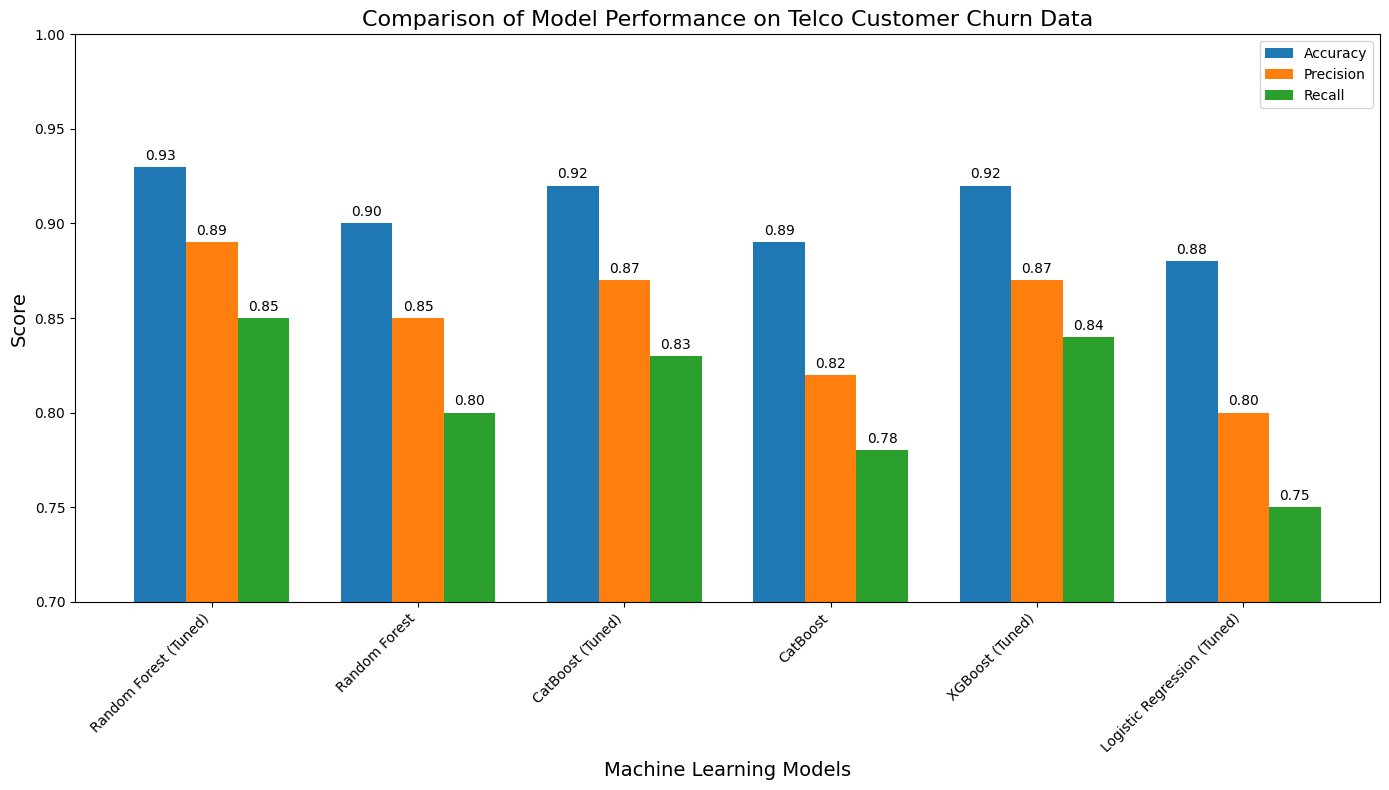

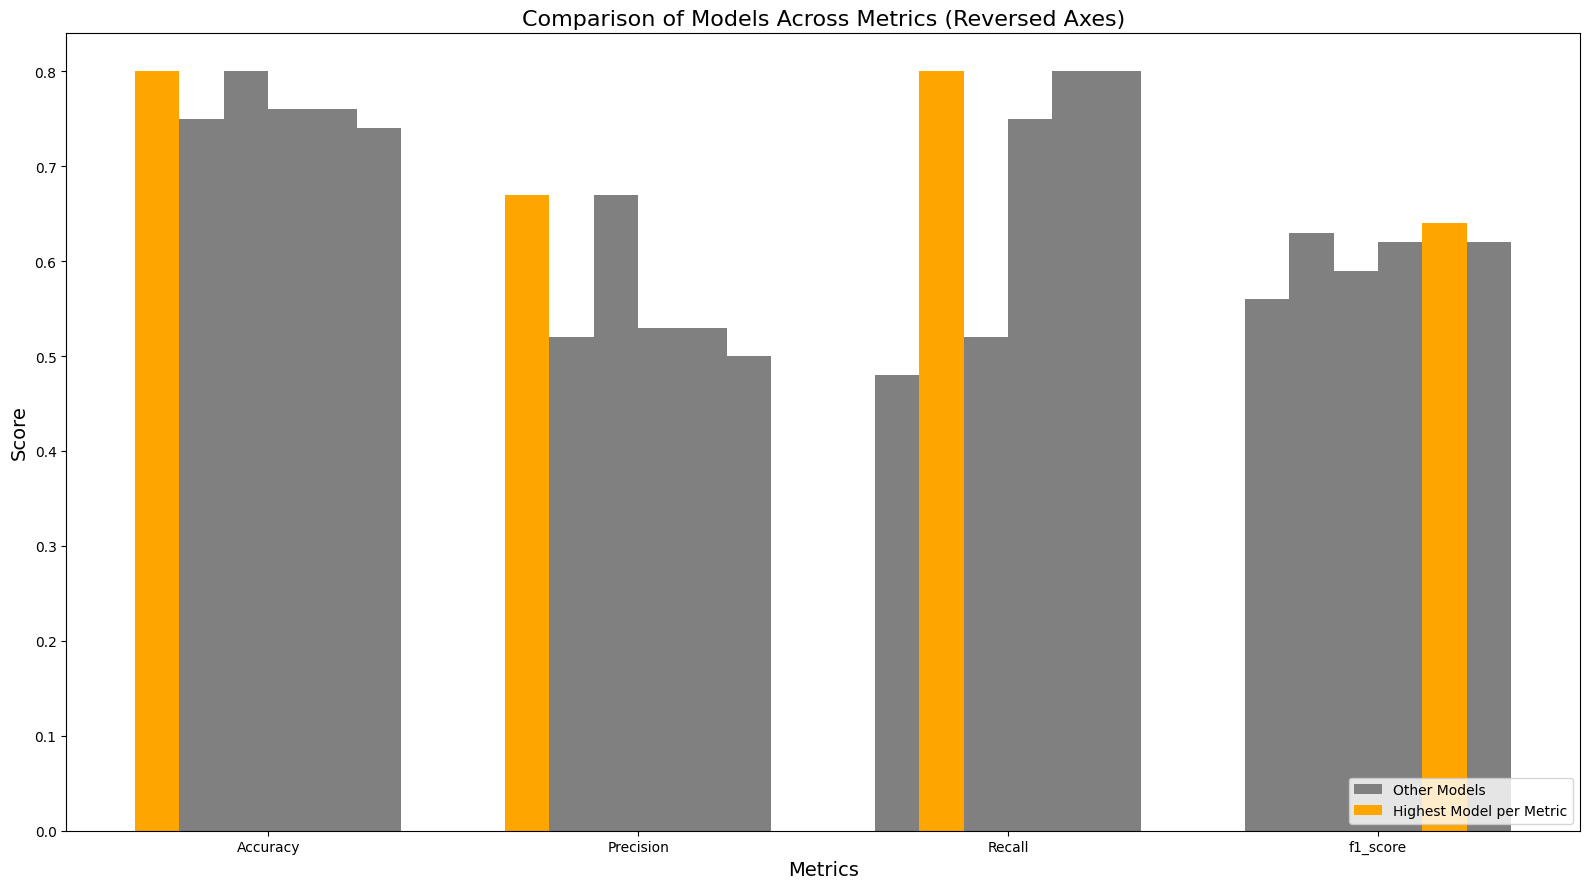

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sample data
data = {
    'Model': ['Random Forest (Tuned)', 'Random Forest', 'CatBoost (Tuned)', 'CatBoost', 'XGBoost (Tuned)', 'Logistic Regression (Tuned)'],
    'Accuracy': [0.80, 0.75, 0.80, 0.76, 0.76, 0.74],
    'Precision': [0.67, 0.52, 0.67, 0.53, 0.53, 0.50],
    'Recall': [0.48, 0.80, 0.52, 0.75, 0.80, 0.80],
    'f1_score': [0.56, 0.63, 0.59, 0.62, 0.64, 0.62]
}
df = pd.DataFrame(data).set_index('Model')

# Metrics as x-axis
metrics = df.columns
num_metrics = len(metrics)
bar_width = 0.12
index = np.arange(num_metrics)

highlight_color = "orange"
default_color = "grey"

fig, ax = plt.subplots(figsize=(16, 9))

# Loop over models and plot bars for each metric
for i, model in enumerate(df.index):
    # For each metric, check if this model is the highest
    colors = []
    for metric in metrics:
        max_model = df[metric].idxmax()
        if model == max_model:
            colors.append(highlight_color)
        else:
            colors.append(default_color)
    
    ax.bar(index + i * bar_width, df.loc[model], bar_width, label=model if i == 0 else "", color=colors)

# Set x-axis
ax.set_xticks(index + (len(df.index) - 1) * bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_xlabel("Metrics", fontsize=14)
ax.set_ylabel("Score", fontsize=14)
ax.set_title("Comparison of Models Across Metrics (Reversed Axes)", fontsize=16)

# Legend
custom_legend = [
    Patch(facecolor=default_color, label="Other Models"),
    Patch(facecolor=highlight_color, label="Highest Model per Metric")
]
ax.legend(handles=custom_legend, loc="lower right")

plt.tight_layout()
plt.show()


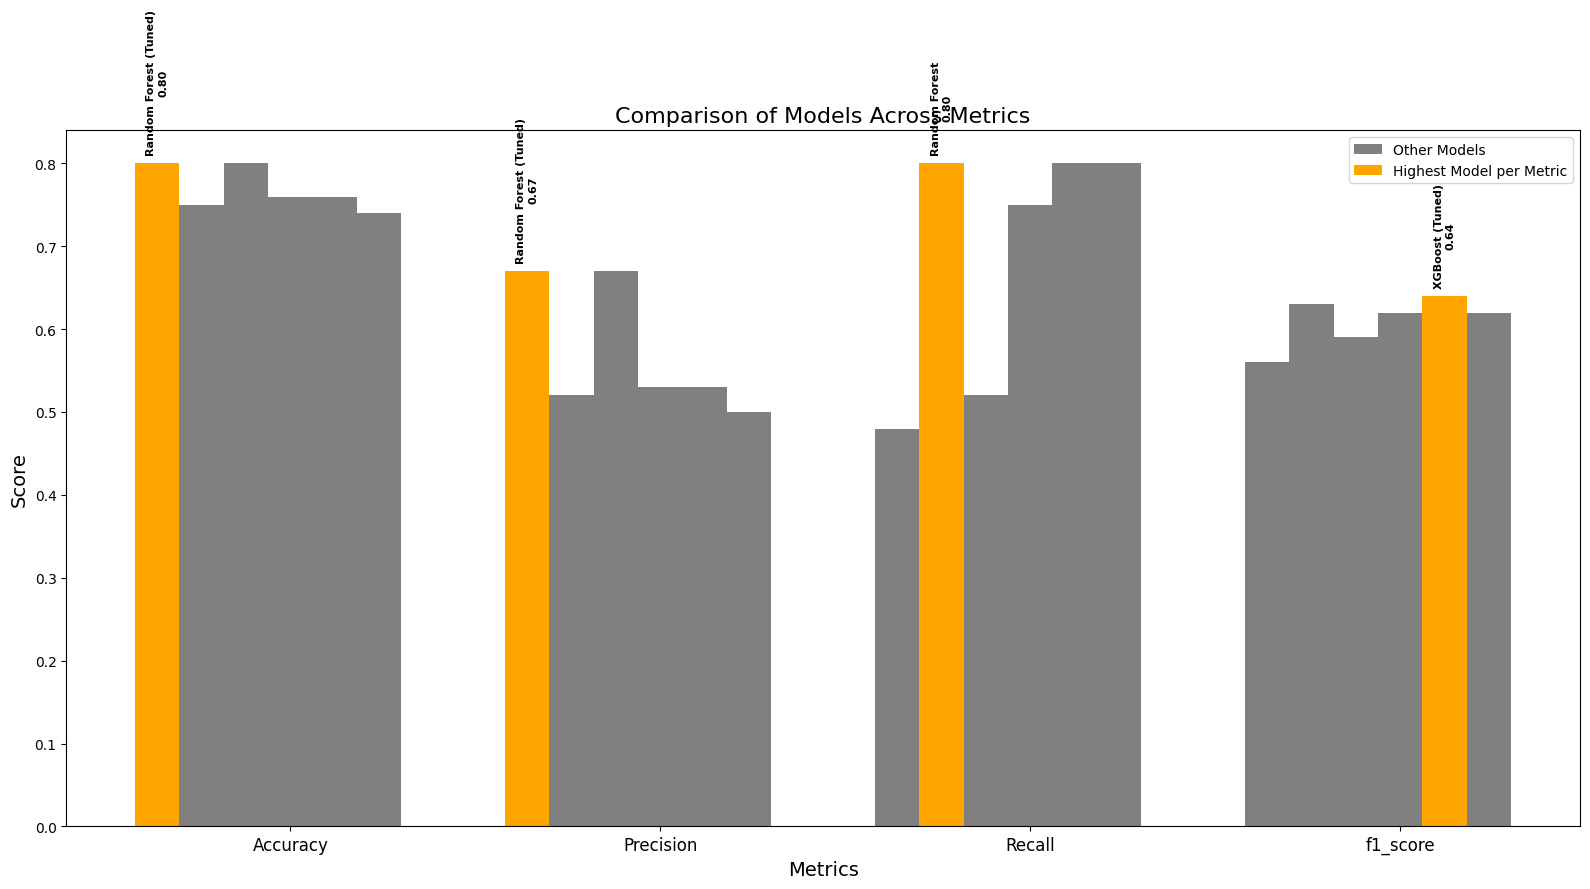

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sample data
data = {
    'Model': ['Random Forest (Tuned)', 'Random Forest', 'CatBoost (Tuned)', 'CatBoost', 'XGBoost (Tuned)', 'Logistic Regression (Tuned)'],
    'Accuracy': [0.80, 0.75, 0.80, 0.76, 0.76, 0.74],
    'Precision': [0.67, 0.52, 0.67, 0.53, 0.53, 0.50],
    'Recall': [0.48, 0.80, 0.52, 0.75, 0.80, 0.80],
    'f1_score': [0.56, 0.63, 0.59, 0.62, 0.64, 0.62]
}
df = pd.DataFrame(data).set_index('Model')

# Metrics as x-axis
metrics = df.columns
num_metrics = len(metrics)
bar_width = 0.12
index = np.arange(num_metrics)

highlight_color = "orange"
default_color = "grey"

fig, ax = plt.subplots(figsize=(16, 9))

# Plot bars
for i, model in enumerate(df.index):
    for j, metric in enumerate(metrics):
        value = df.loc[model, metric]
        max_model = df[metric].idxmax()
        
        # Decide color
        color = highlight_color if model == max_model else default_color
        
        # Bar position
        xpos = j + i * bar_width - (len(df.index) * bar_width) / 2
        bar = ax.bar(xpos, value, bar_width, color=color)
        
        # If highest → add label
        if model == max_model:
            ax.text(
                xpos, value + 0.01,
                f"{model}\n{value:.2f}",
                ha="center", va="bottom",
                fontsize=8, rotation=90, color="black", fontweight="bold"
            )

# Set x-axis
ax.set_xticks(np.arange(num_metrics))
ax.set_xticklabels(metrics, fontsize=12)
ax.set_xlabel("Metrics", fontsize=14)
ax.set_ylabel("Score", fontsize=14)
ax.set_title("Comparison of Models Across Metrics", fontsize=16)

# Legend
custom_legend = [
    Patch(facecolor=default_color, label="Other Models"),
    Patch(facecolor=highlight_color, label="Highest Model per Metric")
]
ax.legend(handles=custom_legend, loc="upper right")

plt.tight_layout()
plt.show()


In [217]:
import joblib

# Get the best pipeline (preprocessor + XGBClassifier with best params)
best_xgb_pipeline = opt.best_estimator_

# Save
joblib.dump(best_xgb_pipeline, "../models/xgb_pipeline.pkl")



['../models/xgb_pipeline.pkl']